<a href="https://colab.research.google.com/github/Sivu008x/CUTE/blob/master/RandomPortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install treecorr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 14.6 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/rmjarvis/TreeCorr.git

Cloning into 'TreeCorr'...
remote: Enumerating objects: 19108, done.
remote: Counting objects: 100% (1867/1867), done.
remote: Compressing objects: 100% (825/825), done.
remote: Total 19108 (delta 1221), reused 1191 (delta 1039), pack-reused 17241 (from 3)
Receiving objects: 100% (19108/19108), 53.01 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (15188/15188), done.


In [ ]:
%cd TreeCorr/tests/

/content/TreeCorr/tests


In [ ]:
# First some imports that we'll use below
from __future__ import print_function
from astropy.io import fits
import treecorr
import fitsio
import numpy
import time
import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_name = 'Aardvark.fit'
data = fitsio.read(file_name)
print(data.dtype)  # Includes ra, dec, redshift, and lensing observables
print(data.shape)  # 390K objects

[('INDEX', '>i4'), ('RA', '>f4'), ('DEC', '>f4'), ('Z', '>f4'), ('EPSILON', '>f4', (2,)), ('GAMMA1', '>f4'), ('GAMMA2', '>f4'), ('KAPPA', '>f4'), ('MU', '>f4')]
(390935,)


In [ ]:
from astropy.table import Table, Column
from astropy.io import fits

# Open the input FITS file
with fits.open('Aardvark.fit') as hdul:
    # Create a new table with only the first four columns

    # Access the columns by name using a list comprehension
    new_table = Table([hdul[1].data[col] for col in ['RA', 'DEC', 'Z']],
                      names=['RA', 'DEC', 'Z'])

    # Write the new table to a new FITS file
    new_table.write('sivu.fit', format='fits', overwrite=True)

file_name = 'sivu.fit'
data = fitsio.read(file_name)
print(data.dtype)  # Includes ra, dec, redshift, and lensing observables
print(data.shape)  # 390K objects


with fits.open('sivu.fit') as hdu:
    sivu_table = Table(hdu[1].data)

with fits.open('sivu.fit') as hdul:
    # Read the data into an Astropy Table
    table = Table(hdul[1].data)

    # Filter the table based on DEC values
    filtered_table = table[(table['DEC'] >= 84) & (table['DEC'] <= 90)]

    # Write the filtered table to a new FITS file
    filtered_table.write('sivu_filtered.fit', format='fits', overwrite=True)

#type(sivu_table)

#print(sivu_table)

[('RA', '>f4'), ('DEC', '>f4'), ('Z', '>f4')]
(390935,)


In [1]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np

# REading FITS file

hdu1 = fits.open('sivu_filtered.fit')
#hdu1.info()
data = hdu1[1].data
#Extracting RA and Dec columns

ra = data['RA']
dec = data['DEC']
print(len(ra))
print(len(dec))
#Randomly selecting a portion of the data

SectionChosen = 0.1    #Percentage of the randomly selected portion of the data
ranRA = np.random.choice((len(ra)), size = int(len(ra)*SectionChosen))
ranDEC = np.random.choice((len(dec)), size = int(len(dec)*SectionChosen))

sub_ra = ra[ranRA]
sub_dec = dec[ranDEC]

#Creating a catalog with the new DEC and RA

cat = treecorr.Catalog(ra=sub_ra, dec=sub_dec, ra_units='degrees', dec_units='degrees')

##Creating an NNCorelation object

nn = treecorr.NNCorrelation(min_sep=0.01, max_sep=10, bin_size=0.4, sep_units='degrees')

ra_min = numpy.min(cat.ra)
ra_max = numpy.max(cat.ra)
dec_min = numpy.min(cat.dec)
dec_max = numpy.max(cat.dec)
print('ra range = %f .. %f' % (ra_min, ra_max))
print('dec range = %f .. %f' % (dec_min, dec_max))

rand_ra = numpy.random.uniform(ra_min, ra_max, 20255)
rand_sindec = numpy.random.uniform(numpy.sin(dec_min), numpy.sin(dec_max), 20255)
rand_dec = numpy.arcsin(rand_sindec)



rand_ra_pi = rand_ra / numpy.pi
rand_cosdec = numpy.cos(rand_dec)

# Check that the randoms cover the same space as the data
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# Plot filtered data on the first subplot
ax1.scatter(cat.ra * 180 / np.pi, cat.dec * 180 / np.pi, color='blue', s=0.1)

ax1.scatter(rand_ra * 180 / np.pi, rand_dec* 180 / np.pi , color='green', s=0.1)
ax1.set_xlabel('RA (degrees)')
ax1.set_ylabel('Dec (degrees)')
ax1.set_title('Randoms on top of filtered data')

# Plot filtered data on the second subplot (with reversed order)
ax2.scatter(rand_ra * 180 / np.pi, rand_dec* 180 / np.pi , color='green', s=0.1)
ax2.scatter(cat.ra * 180 / np.pi, cat.dec * 180 / np.pi, color='blue', s=0.1)

ax2.set_xlabel('RA (degrees)')
ax2.set_ylabel('Dec (degrees)')
ax2.set_title('Filtered data on top of randoms')

plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'sivu_filtered.fit'

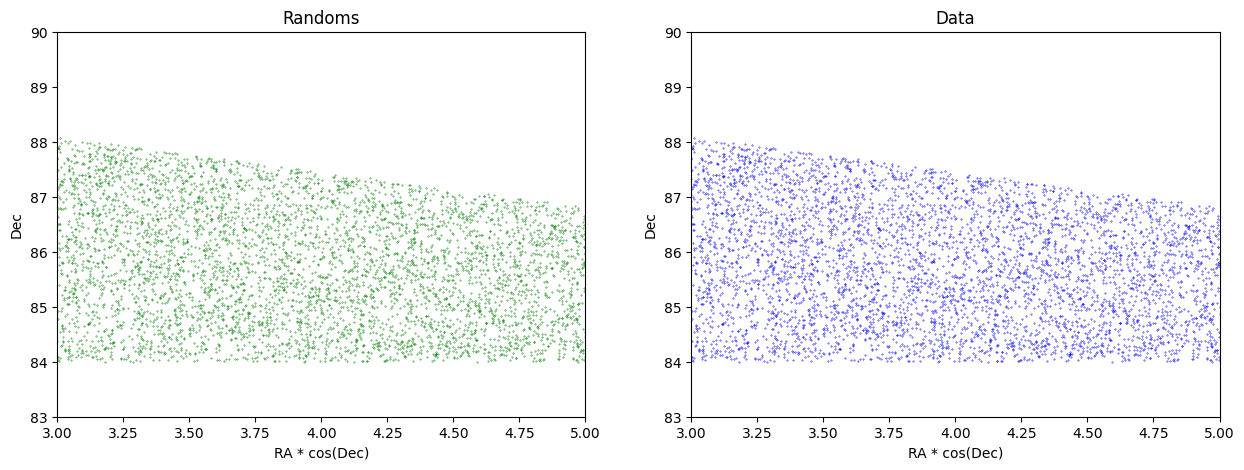

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(rand_ra * 180/numpy.pi * numpy.cos(rand_dec), rand_dec * 180/numpy.pi, color='green', s=0.1)
ax1.set_xlabel('RA * cos(Dec)')
ax1.set_ylabel('Dec')
ax1.set_xlim(3,5)
ax1.set_ylim(83,90)
ax1.set_title('Randoms')

ax2.scatter(cat.ra * 180/numpy.pi * numpy.cos(cat.dec), cat.dec * 180/numpy.pi, color='blue', s=0.1)
ax2.set_xlabel('RA * cos(Dec)')
ax2.set_ylabel('Dec')
ax2.set_xlim(3,5)
ax2.set_ylim(83,90)
ax2.set_title('Data')

plt.show()

In [ ]:
rand = treecorr.Catalog(ra=rand_ra, dec=rand_dec, ra_units='radians', dec_units='radians')
rr = treecorr.NNCorrelation(min_sep=0.01, max_sep=10, bin_size=0.4, sep_units='degrees')
rr.process(rand)

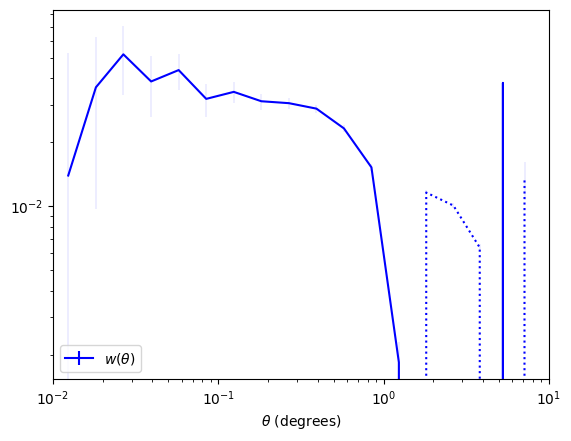

In [ ]:
# Calculate xi and varxi using the processed data from dd and rr
nn.process(cat)
xi, varxi = nn.calculateXi(rr=rr)

# Compute r based on the meanlogr values
r = numpy.exp(nn.meanlogr)
sig = numpy.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=0.1, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (degrees)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
plt.xlim([0.01,10])
plt.show()

In [ ]:
# Calculate xi and varxi using the processed data from dd and rr
nn.process(cat)
xi, varxi = nn.calculateXi(rr=rr)

# Compute r based on the meanlogr values
r = numpy.exp(nn.meanlogr)
sig = numpy.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=0.1, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (degrees)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
plt.xlim([0.01,10])
plt.show()